In [281]:
from sko.PSO import PSO
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import pandas
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [282]:
np.random.seed(1)  #控制变量
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
         'num']
HeartDisease = pandas.read_csv('./processed.cleveland.csv', header=None, names=names)
median = HeartDisease['ca'].median()
HeartDisease['ca'].fillna(median, inplace=True)
median = HeartDisease['thal'].median()
HeartDisease['thal'].fillna(median, inplace=True)
label = HeartDisease['num']
data = HeartDisease.drop(['num'], axis=1)

In [283]:
def func(x):
    x1,x2=x
    clf = SVC
    socre = cross_val_score(clf(kernel='linear',C=x1, gamma=x2),data, label, cv=3).mean()
    return 1-socre

In [284]:
pso = PSO(func=func, n_dim=2, pop=10, max_iter=100, lb=[0.01, 0.0001], ub=[10, 10], w=0.8, c1=0.5, c2=0.5)
pso.record_mode = True
pso.run()
print('best_C and best_gamma is ', pso.gbest_x, 'best_cost is', pso.gbest_y)

best_C and best_gamma is  [0.07296005 7.12430238] best_cost is [0.15511551]


In [285]:
clf=SVC(kernel='linear',C=pso.gbest_x[0],gamma=pso.gbest_x[1])
acc  = cross_val_score(clf, data,label, cv=3)
print(np.mean(acc))

0.8448844884488449


In [286]:
clf=SVC(kernel='linear')
acc  = cross_val_score(clf, data,label, cv=3)
print(np.mean(acc))

0.8283828382838284


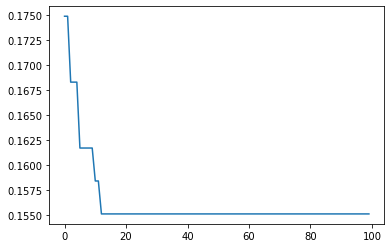

In [287]:
plt.plot(pso.gbest_y_hist)
plt.show()

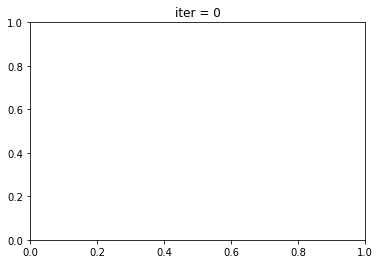

In [288]:
record_value = pso.record_value
X_list, V_list = record_value['X'], record_value['V']
fig, ax = plt.subplots(1, 1)
def update_scatter(frame):
    i, j = frame // 10, frame % 10
    ax.set_title('iter = ' + str(i))
    X_tmp = X_list[i] + V_list[i] * j / 10.0
    plt.setp(line, 'xdata', X_tmp[:, 0], 'ydata', X_tmp[:, 1])
    return line
ani = FuncAnimation(fig, update_scatter, blit=True, interval=25, frames=50 * 10)
plt.show()
ani.save('pso.gif', writer='pillow')